In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exp_name = "seq_exp_compass_hyperparameter_tuning"
exp_number = "adam_lr_0.01_iter_1500_s_True"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

# Plots

In [3]:
metric_symbol = {"Total Utility": "T",
                 "Utility": "U",
                 "Fairness": "F"}
runs = range(10)

In [4]:
l_exp = "l_0.5"
bootstrap_results = pd.read_csv(results_path + f"/{l_exp}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
marginal_results = pd.read_csv(results_path + f"/{l_exp}/marginal_results_all.csv",header=[0, 1],index_col=[0])

In [5]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [6]:
boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results, metric_name = "eval_loss", runs=runs)
marginal_loss = get_metrics_from_multi_columns(data=marginal_results, metric_name = "eval_loss", runs=runs)
bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
all_results = {
    "bootstrap_mean":bootstrap_mean,
    "bootstrap_std":bootstrap_std,
    "marginal_mean":marginal_mean,
    "marginal_std":marginal_std,
    
}
all_results = pd.DataFrame(all_results)

In [7]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    x = range(all_results["bootstrap_mean"].shape[0])
    plt.plot(x, all_results["bootstrap_mean"],"--")
    plt.fill_between(x = x,
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(x, all_results["marginal_mean"],"--")
    plt.fill_between(x = x,
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


KeyError: 'Balance'

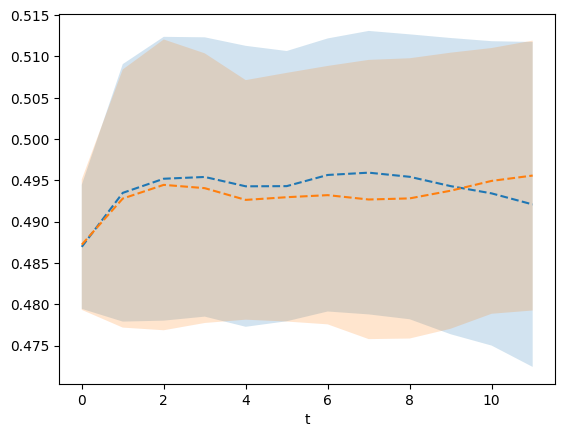

In [8]:
plot_metric(all_results = all_results, metric="Balance",  l= 0)

In [9]:
for l in [0.0, 0.1, 0.2, 0.3, 0.4]:
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=range(10))
    
    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_fairness_loss",
                                                   runs=runs)
    
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        "bootstrap_mean":bootstrap_mean,
        "bootstrap_std":bootstrap_std,
        "marginal_mean":marginal_mean,
        "marginal_std":marginal_std,

    }
    all_results = pd.DataFrame(all_results)

    plot_metric(all_results = all_results, metric="Fairness",  l= l)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/seq_exp_compass_hyperparameter_tuning/adam_lr_0.01_iter_1500_s_True/l_0.0/boostrap_results_all.csv'

In [10]:
def results_metrics(marginal_results,bootstrap_results, metric_name, runs):
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

In [11]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    ax1.plot(range(eval_loss.shape[0]), eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(range(eval_loss.shape[0]), eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = range(eval_loss.shape[0]),
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.set(xlabel='t', ylabel='T')
    ax1.legend()

    # plot utility
    ax2.plot(range(eval_utility.shape[0]), eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(range(eval_utility.shape[0]), eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = range(eval_utility.shape[0]),
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.set(xlabel='t', ylabel='U')
    ax2.legend()

    # fairness
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(range(eval_fainress.shape[0]), eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = range(eval_fainress.shape[0]),
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.set(xlabel='t', ylabel='F')
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [12]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    x = range(eval_loss["bootstrap_mean"].shape[0])
    ax1.plot(x, eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.legend()

    # plot utility
    ax2.plot(x, eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(x, eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [13]:
boostrap_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = "eval_utility",
                                                   runs=runs)

In [14]:
mean = boostrap_loss.mean(axis=1)
std = boostrap_loss.std(axis=1)

In [15]:
y1 = (mean-std).values
y2 = (mean+std).values

<Figure size 640x480 with 0 Axes>

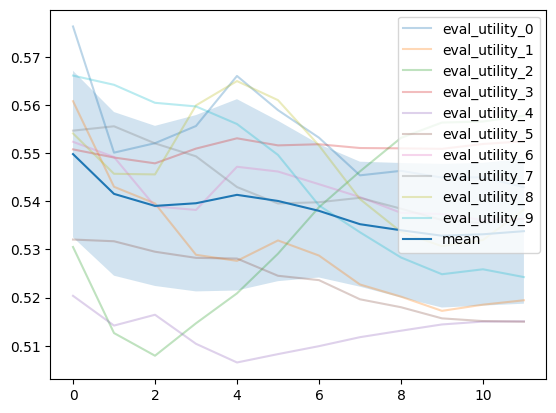

In [16]:
x = range(mean.shape[0])
plt.figure()
boostrap_loss.plot(alpha = 0.3)
plt.plot(x, mean,label="mean")
plt.fill_between(x = x,
                 y1 = y1,
                 y2 = y2,
                 alpha = 0.2)
plt.legend()

In [17]:
boostrap_loss.sample(frac=1, replace=False).reset_index(drop=True)

,eval_utility_0,eval_utility_1,eval_utility_2,eval_utility_3,eval_utility_4,eval_utility_5,eval_utility_6,eval_utility_7,eval_utility_8,eval_utility_9
0,0.542942,0.519448,0.557804,0.552486,0.515071,0.514996,0.536368,0.536408,0.538259,0.524264
1,0.553227,0.528738,0.538775,0.551865,0.509912,0.523629,0.543561,0.539815,0.551613,0.539153
2,0.555656,0.528895,0.514664,0.550962,0.510401,0.528258,0.538209,0.549355,0.559940,0.559724
3,0.576335,0.560810,0.530514,0.550796,0.520372,0.532064,0.552369,0.554693,0.554113,0.566131
4,0.552086,0.539570,0.507924,0.547896,0.516438,0.529533,0.538963,0.552046,0.545597,0.560476
5,0.550120,0.543025,0.512634,0.549107,0.514190,0.531707,0.549213,0.555598,0.545727,0.564216
6,0.566054,0.527634,0.520885,0.553101,0.506521,0.528115,0.547185,0.542972,0.564989,0.556070
7,0.544941,0.517245,0.556373,0.550911,0.514422,0.515688,0.537363,0.536125,0.530681,0.524857
8,0.545010,0.518528,0.556589,0.551918,0.515019,0.515126,0.536119,0.535440,0.531967,0.525885
9,0.558956,0.531878,0.529121,0.551630,0.508259,0.524537,0.546198,0.539559,0.561028,0.549647


In [26]:
ls = [0.5,0.8,1.0]

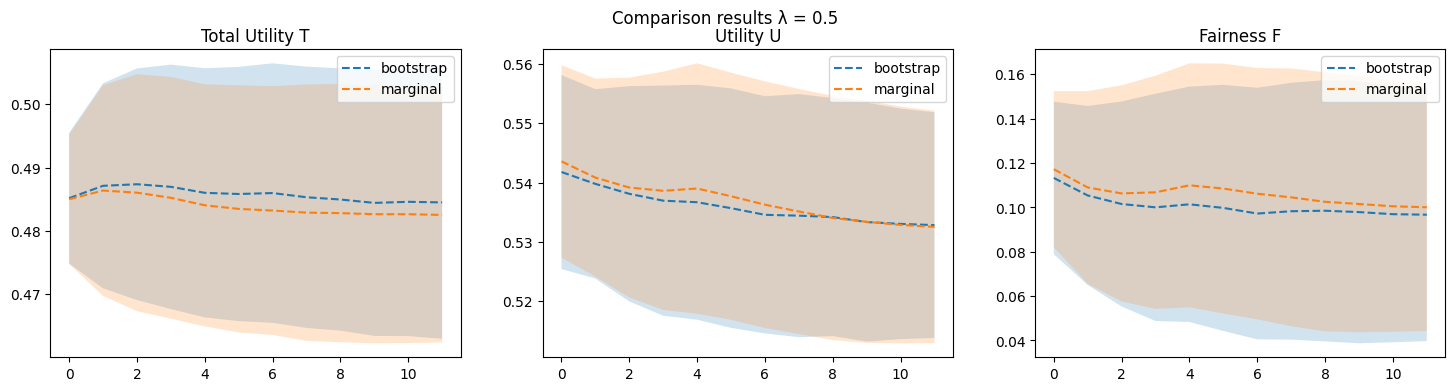

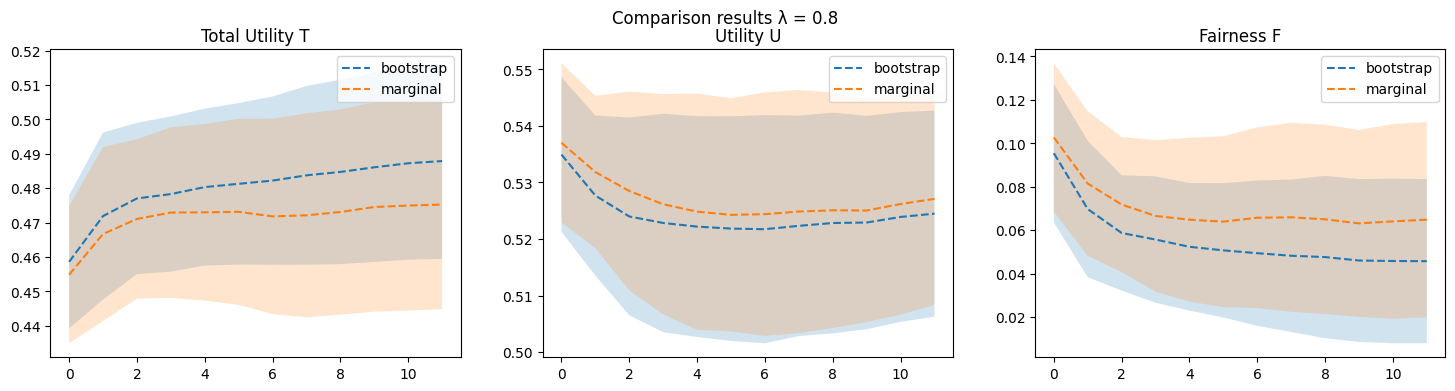

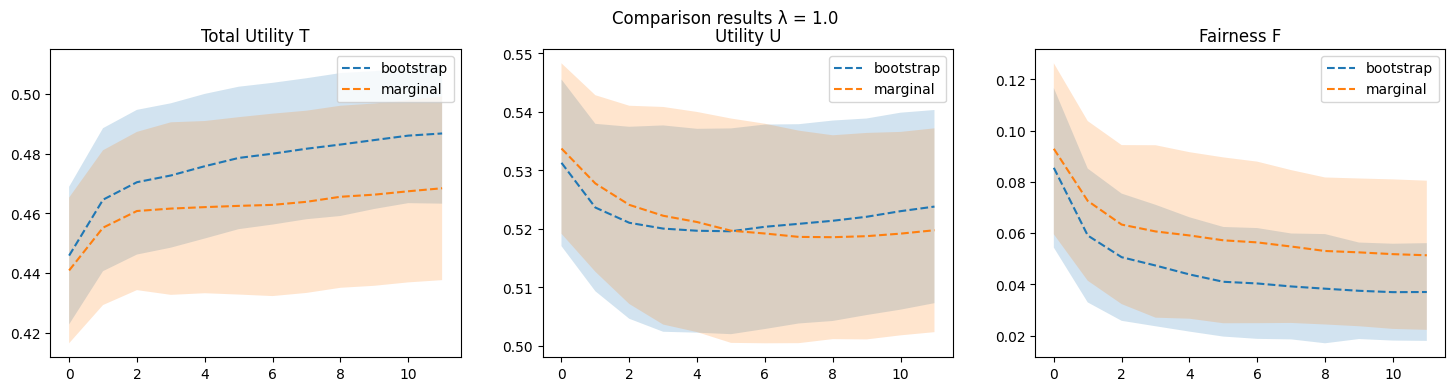

In [27]:
runs = range(75) 
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

In [37]:
eval_fainress

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.085484,0.031134,0.092916,0.033372
1,0.059072,0.026116,0.072575,0.031157
2,0.050599,0.024830,0.063328,0.031026
3,0.047350,0.023702,0.060653,0.033654
4,0.043873,0.022310,0.059092,0.032500
5,0.041005,0.021391,0.057188,0.032369
6,0.040350,0.021621,0.056376,0.031522
7,0.039186,0.020664,0.054765,0.029826
8,0.038308,0.021306,0.053026,0.028687
9,0.037488,0.018831,0.052489,0.028836


In [ ]:
[0.0,0.5,1.0]

In [38]:
plt.rcParams.update({'font.size': 12})

In [41]:
exp_name = "exp_compass_seq_tests"
exp_number = "test_2_lr_01_iter_1500_adam"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

In [42]:
runs = range(10)
l_results = []
ls = [0.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [43]:
exp_name = "seq_exp_compass_hyperparameter_tuning"
exp_number = "adam_lr_0.01_iter_1500_s_True"
results_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/continuous/{exp_name}/{exp_number}"

In [44]:
runs = range(75)
ls = [ 0.8, 1.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [49]:
len(l_results)

3

In [50]:
ls = [0.0,0.8,1.0]

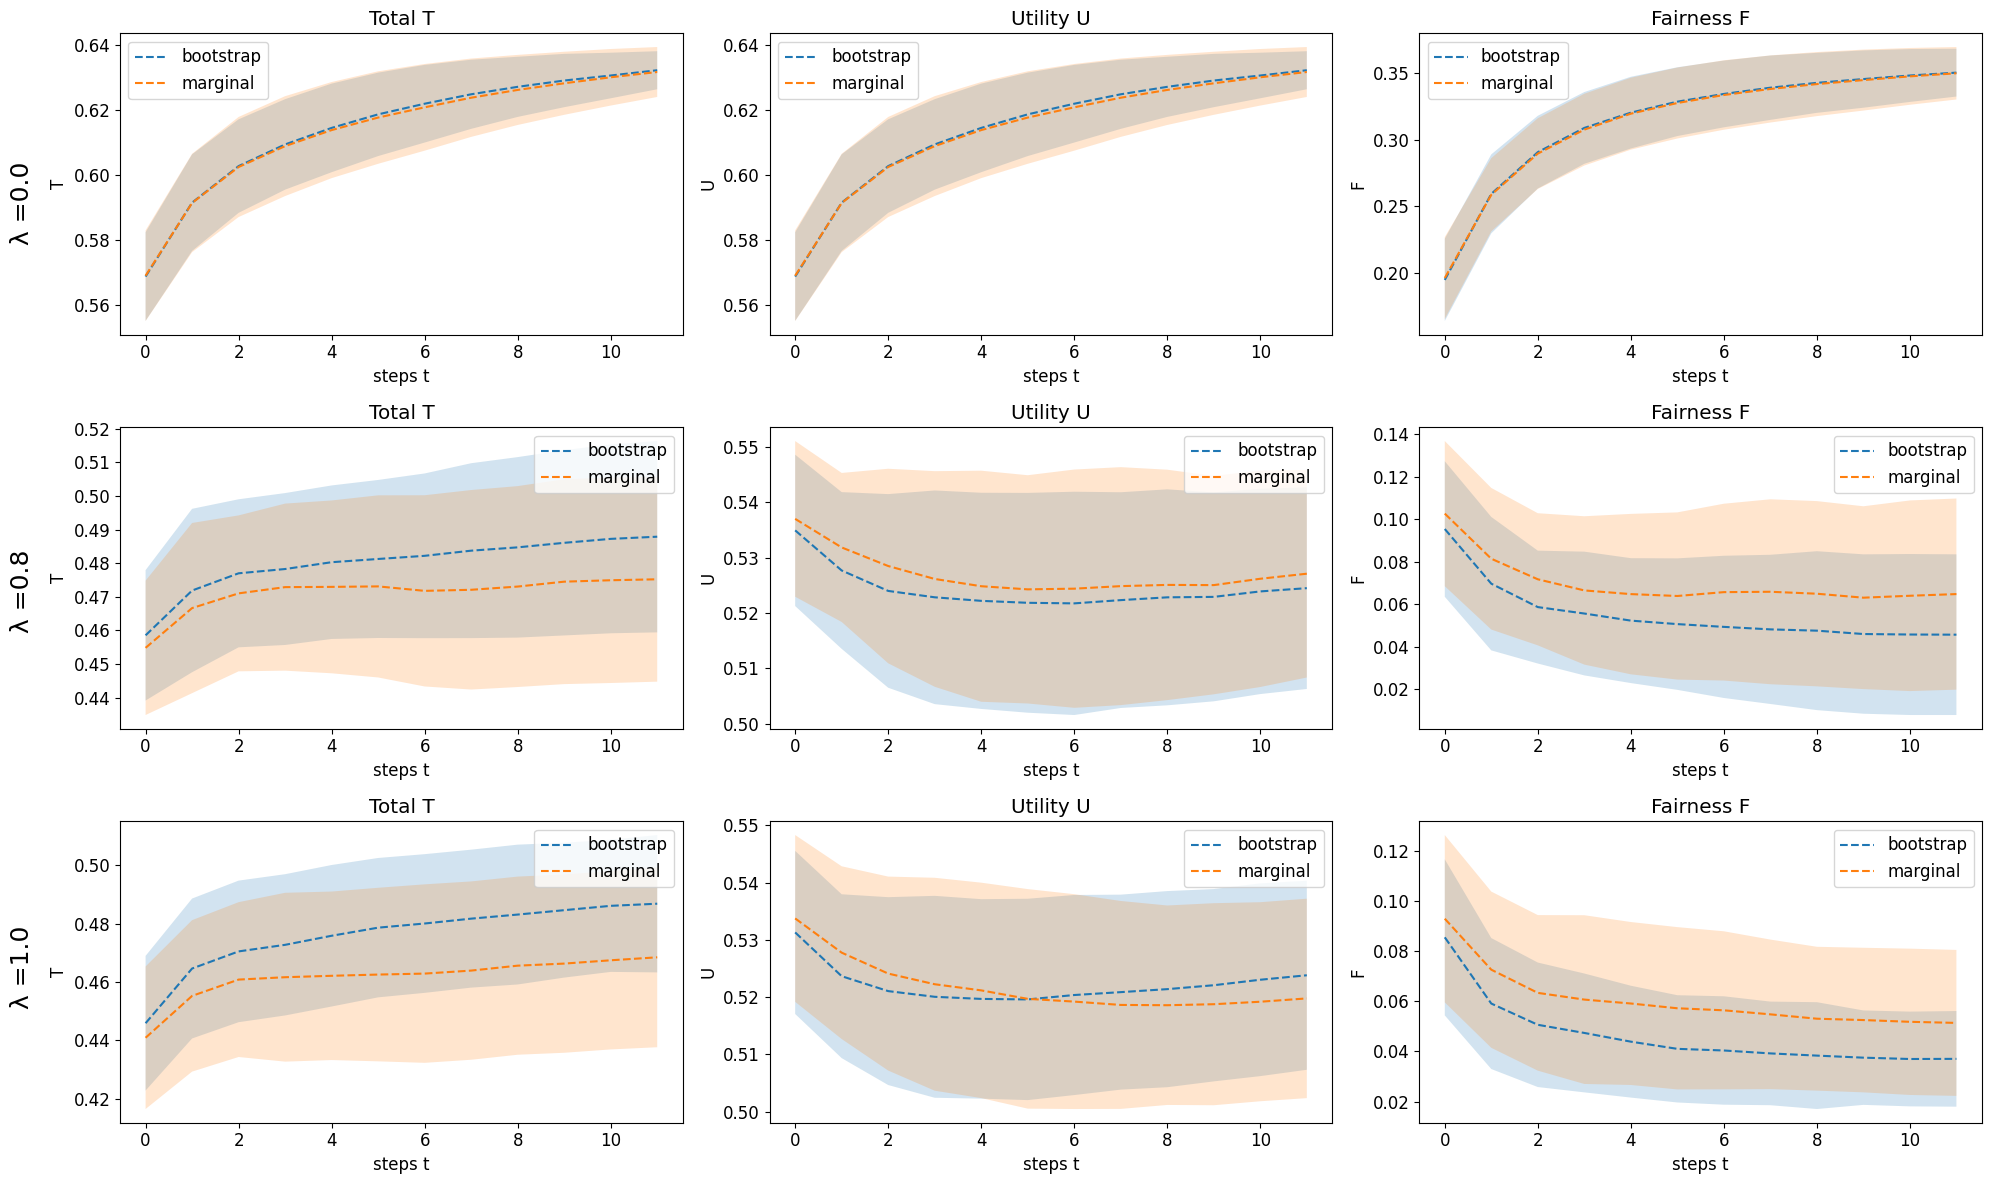

In [51]:
subplots_comparison_paper(ls=ls, losses_list=l_results, save_path=results_path)

In [46]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    fig.text(0.005, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.005, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.005, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0]["bootstrap_mean"].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t', ylabel=f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x =x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
#     fig.suptitle(f"Comparison results for different λ parameter")
    plt.tight_layout()
    fig.subplots_adjust(left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()

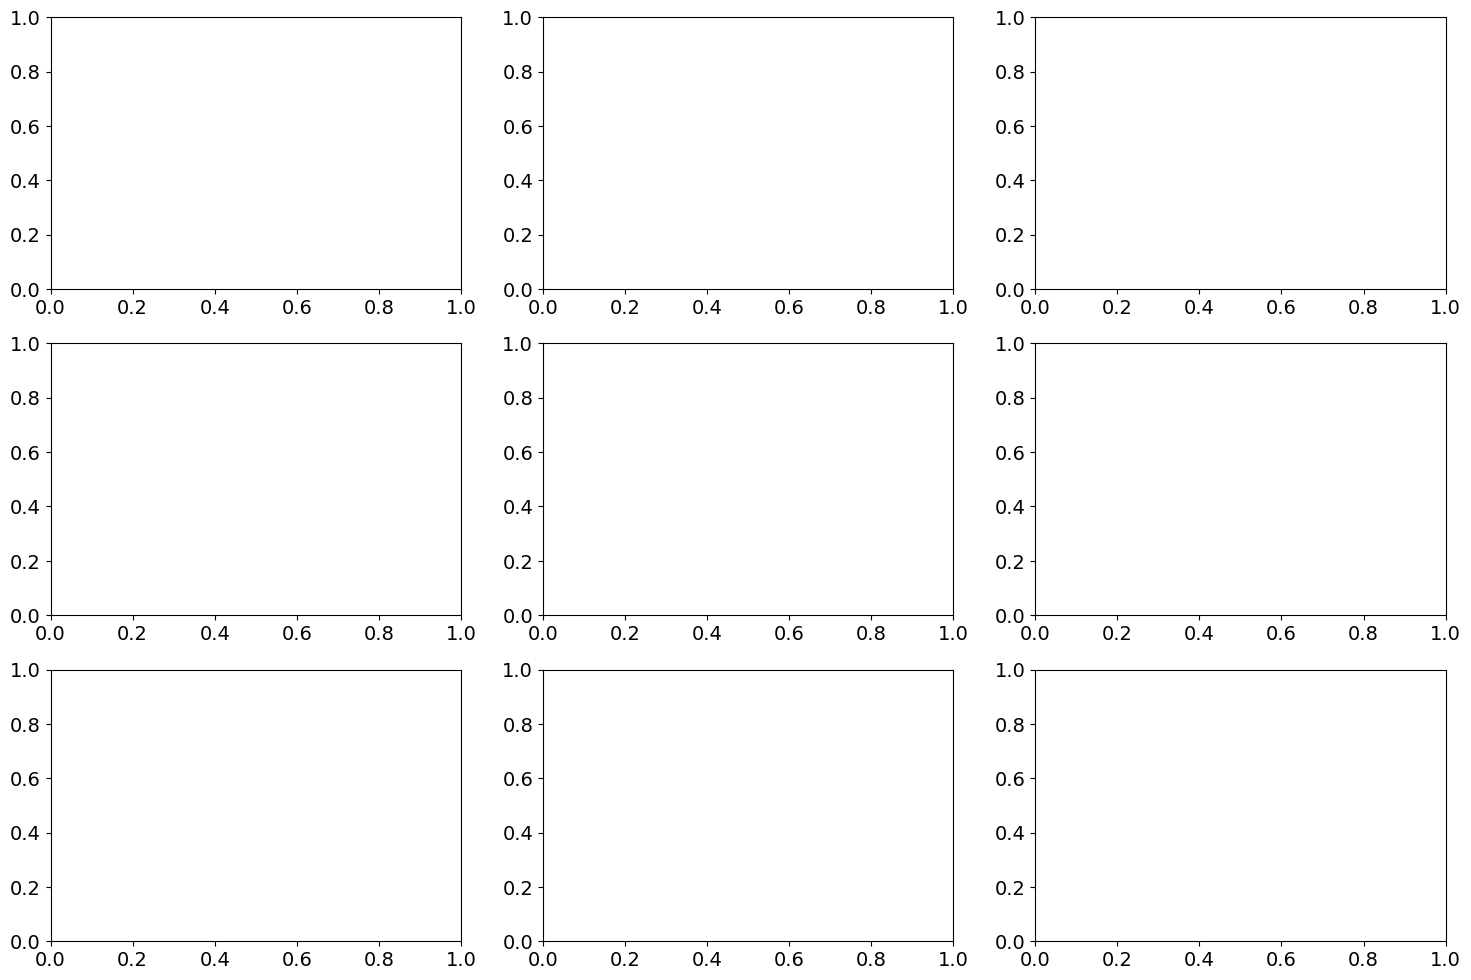

In [62]:
ls = [0.0, 0.4, 0.5]
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

In [39]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

In [43]:
for l, ax, losses in zip(ls, axes, l_results):
    print(l)
    print(ax)


0.0
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.4
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.5
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


In [45]:
losses[0]

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.498035,0.011488,0.494452,0.002819
1,0.525584,0.001784,0.523854,0.000571
2,0.528064,0.000488,0.529366,0.000120
3,0.528996,0.000476,0.531090,0.000055
4,0.529731,0.000971,0.530989,0.000032
5,0.529490,0.000789,0.530968,0.000037
6,0.530085,0.000913,0.530823,0.000071
7,0.530178,0.000853,0.530696,0.000028
8,0.530311,0.000798,0.530507,0.000036
9,0.529781,0.000465,0.529595,0.000010
